### Time series data
* Using model CNRM

In [3]:
# Load useful packages
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy
from datetime import datetime, timedelta
import numpy as np
import pyproj
from dask.diagnostics import ProgressBar
import matplotlib.dates as mdate
import intake
import cftime

In [4]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [5]:
cat = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['SImon','Omon','Ofx'], 
                 variable_id=['siconc','no3','areacello']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
6,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
7,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
8,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
9,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125


In [7]:
# Create dictionary from the list of datasets we found
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [8]:
dset_dict.keys()

dict_keys(['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn'])

In [9]:
areacello = dset_dict[list(dset_dict.keys())[0]].isel(member_id = 0).squeeze()
no3 = dset_dict[list(dset_dict.keys())[1]]
si = dset_dict[list(dset_dict.keys())[2]]

In [10]:
areacello

<xarray.Dataset>
Dimensions:     (y: 294, x: 362, nvertex: 4)
Coordinates:
    bounds_lat  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    member_id   <U9 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex
Data variables:
    areacello   (y, x) float32 dask.array<chunksize=(294, 362), meta=np.ndarray>
Attributes: (12/47)
    intake_esm_varname:      ['areacello']
    grid_label:              gn
    forcing_index:           2
    license:                 CMIP6 model data produced by CNRM-CERFACS is lic...
    table_id:                Ofx
    parent_mip_era:          CMIP6
    ...                      ...
    institution_id:          CNRM-CERFACS
    dr2xml_md5sum:           92ddb3d0d8ce79f498d792fc8e559dcf
    experiment_id:           historical
    realm:                   ocean
    activity_id:             CMIP
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn

### Select areas with areacello

In [12]:
# Select area of interest: Siberian Sea
SS = areacello.where((areacello.lon>= 100) & 
                   (areacello.lon<= 160) & 
                   (areacello.lat<= 80) & 
                   (areacello.lat>= 70),drop = True) 
# Greenland Sea
GL = areacello.where((areacello.lon>= -10) & 
                   (areacello.lon<= 10) & 
                   (areacello.lat<= 85) & 
                   (areacello.lat>= 70),drop = True) 


In [15]:
SS

<xarray.Dataset>
Dimensions:     (y: 30, x: 37, nvertex: 4)
Coordinates:
    bounds_lat  (y, x, nvertex) float64 dask.array<chunksize=(30, 37, 4), meta=np.ndarray>
    bounds_lon  (y, x, nvertex) float64 dask.array<chunksize=(30, 37, 4), meta=np.ndarray>
    lat         (y, x) float64 dask.array<chunksize=(30, 37), meta=np.ndarray>
    lon         (y, x) float64 dask.array<chunksize=(30, 37), meta=np.ndarray>
    member_id   <U9 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex
Data variables:
    areacello   (y, x) float32 dask.array<chunksize=(30, 37), meta=np.ndarray>
Attributes: (12/47)
    intake_esm_varname:      ['areacello']
    grid_label:              gn
    forcing_index:           2
    license:                 CMIP6 model data produced by CNRM-CERFACS is lic...
    table_id:                Ofx
    parent_mip_era:          CMIP6
    ...                      ...
    institution_id:          CNRM-CERFACS
    dr2xml_md5sum:           92ddb3d0d8ce79f498d792fc8e559dcf
    experiment_id:           historical
    realm:                   ocean
    activity_id:             CMIP
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn

### Sea ice for September

In [14]:
# average over the ensembles
si_en = si.mean(dim = ['member_id'], keep_attrs=True)
# select area of interest: Greenland
si_SS = si_en.where((si_en.lon>= 100) & 
                    (si_en.lon<= 160) & 
                    (si_en.lat <= 80) & 
                    (si_en.lat >= 70),drop = True)


In [23]:
#iceExt = (xr.where(si_SS['siconc']>15, 1.,0)*SS['areacello']).sum(dim=['x','y'])
#iceExt_monthly = iceExt.groupby('time.month').mean().compute()
iceExt_m = iceExt.groupby('time.month')

In [95]:
iceExt

<xarray.DataArray (time: 1980)>
dask.array<sum-aggregate, shape=(1980,), dtype=float64, chunksize=(600,), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    type       |S6 b'typesi'
    member_id  <U9 'r1i1p1f2'

In [102]:
iceExt_m[9].time.dt.year

<xarray.DataArray 'year' (time: 165)>
array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])
Coordinates:
  * time       (time) object 1850-09-16 00:00:00 ... 2014-09-16 00:00:00
    type       |S6 b'typesi'
    member_id  <U9 'r1i1p1f2'

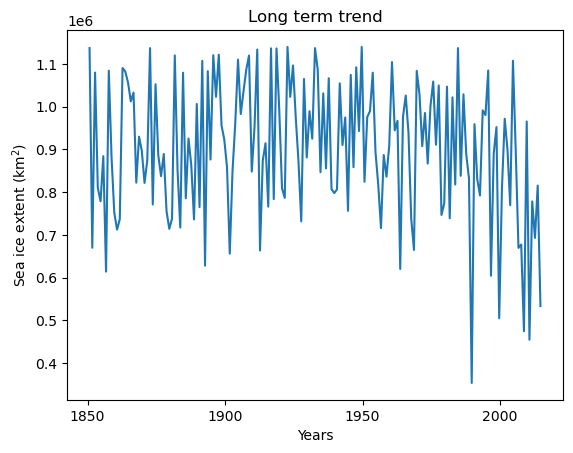

In [118]:
(iceExt_m[9]/1e6).plot()
plt.ylabel('Sea ice extent (km$^{2}$)')
plt.xlabel('Years')
plt.title('Long term trend')
plt.tight_layout
plt.savefig('Long term cnrm trend ice.png')

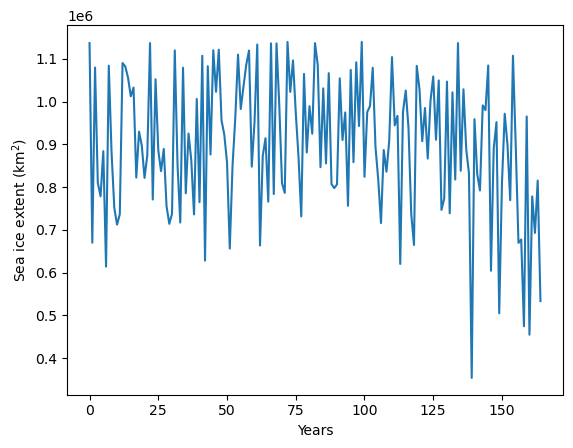

In [117]:
plt.plot((iceExt_m[9])/1e6 )
plt.ylabel('Sea ice extent (km$^{2}$)')
plt.xlabel('Years')
plt.tight_layout
plt.savefig('Long term cnrm trend ice.png')

### Nitrate for May to August

In [28]:
# Surface level
no3_surf = no3.isel(lev = 0)
# Esemble mean
no3_en = no3_surf.mean(dim = ['member_id'], keep_attrs=True)
# Siberian Sea
no3_SS = no3_en.where((no3_en.lon>= 100) & 
                    (no3_en.lon<= 160) & 
                    (no3_en.lat <= 80) & 
                    (no3_en.lat >= 70),drop = True)
# Calulate the area weighted average 
no3_weighted = (SS['areacello']*no3_SS).sum(dim=('y','x'))/SS['areacello'].sum(dim=('y','x'))

In [86]:
yrs = np.unique(no3_weighted.time.dt.year)
yrs[0:164]

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

In [69]:
#no3_m = no3_weighted.groupby('time.month')
no3_y = [no3_weighted['no3'].groupby('time.year')[y].isel(time = slice(4,7)).mean().values for y in range(1850,2014)]

[########################################] | 100% Completed | 8.76 sms
[########################################] | 100% Completed | 5.39 sms
[########################################] | 100% Completed | 4.37 sms
[########################################] | 100% Completed | 3.87 sms
[########################################] | 100% Completed | 4.58 sms
[########################################] | 100% Completed | 4.89 sms
[########################################] | 100% Completed | 3.46 sms
[########################################] | 100% Completed | 4.47 sms
[########################################] | 100% Completed | 4.98 sms
[########################################] | 100% Completed | 3.87 sms
[########################################] | 100% Completed | 6.00 sms
[########################################] | 100% Completed | 4.48 sms
[########################################] | 100% Completed | 4.28 sms
[########################################] | 100% Completed | 4.08 sms
[#####

In [111]:
no3_y

[array(0.01413393, dtype=float32),
 array(0.01432712, dtype=float32),
 array(0.01385112, dtype=float32),
 array(0.01464855, dtype=float32),
 array(0.01393082, dtype=float32),
 array(0.01396339, dtype=float32),
 array(0.01377937, dtype=float32),
 array(0.0133361, dtype=float32),
 array(0.01272916, dtype=float32),
 array(0.01291678, dtype=float32),
 array(0.01252911, dtype=float32),
 array(0.01210926, dtype=float32),
 array(0.01206104, dtype=float32),
 array(0.01313219, dtype=float32),
 array(0.0138305, dtype=float32),
 array(0.01382489, dtype=float32),
 array(0.01385012, dtype=float32),
 array(0.01421228, dtype=float32),
 array(0.01365114, dtype=float32),
 array(0.01353417, dtype=float32),
 array(0.0135525, dtype=float32),
 array(0.01451947, dtype=float32),
 array(0.01391585, dtype=float32),
 array(0.01474423, dtype=float32),
 array(0.01427128, dtype=float32),
 array(0.01433671, dtype=float32),
 array(0.01430272, dtype=float32),
 array(0.01429232, dtype=float32),
 array(0.01436779, dtyp

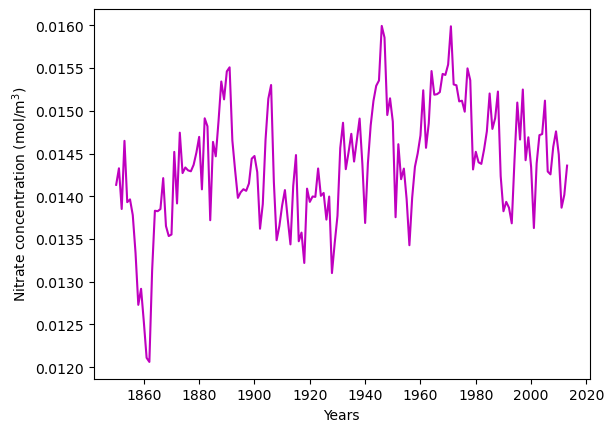

In [116]:
plt.plot(yrs[0:164], no3_y, c = 'm')
plt.xlabel('Years')
plt.ylabel(r'Nitrate concentration (mol/m$^{3}$)')
plt.tight_layout
plt.savefig('Long term cnrm trend no3.png')

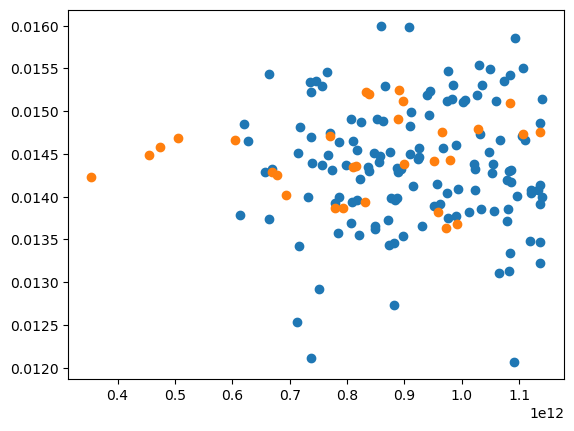

In [94]:
plt.scatter(iceExt_m[9][:-31],no3_y[:-30])
plt.scatter(iceExt_m[9][-31:-1],no3_y[-30:])